In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from Frquencies_plot_func import plot_frequencies_aa_pos
from hamming_dist import hamming_dist, energy_corr_array
from seq_utils import read_tensor_from_txt, set_seed, letters_to_nums, modify_seq, nums_to_letters
import os
import sys
from scipy.stats import linregress
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)
from utils import read_fasta_alignment, remove_duplicate_sequences

import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
font = {'size'   : 16}

In [2]:
#cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
cwd='C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'
save_dir_plm = 'generated_sequences'
filename_plm = 'generated_sequences_randinit_40000'
output_file = cwd + f'/CODE/AttentionDCA_python/src/PLM/{save_dir_plm}/{filename_plm}.npy'
plm_gen_seqs = np.load(output_file)

save_dir_mc = 'mc_generated_sequences'
filename_mc = 'mc_generated_sequences_randinit_100000'
output_file = cwd + f'/CODE/AttentionDCA_python/src/PLM/{save_dir_mc}/{filename_mc}.npy'
mc_gen_seqs = np.load(output_file)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (438031761.py, line 2)

In [ ]:

def plot_decorrelation(correlation,range,save_path=None):
    x_vals = np.arange(range)  # X values for linear fit (steps)
    y_vals = correlation[:range]  # First 1000 correlation values
    
    # Perform linear fit: y = mx + c, extract the slope (m)
    slope, intercept, r_value, p_value, std_err = linregress(x_vals, np.exp(y_vals))
    
    # Store the slope for this beta
    
    
    # Plot the correlation curve and linear fit
    plt.plot(correlation, marker='', linestyle='-', linewidth=1, label="Correlation")
    plt.plot(np.arange(len(correlation)), np.exp(slope * np.arange(len(correlation))), color='r',linestyle="--", label=f"Fit: rate = {slope:.2e}")
    plt.xlabel("Correlation Step")
    plt.ylabel("Correlation")
    plt.legend()
    plt.grid(True)
    if save_path:
        plt.savefig(save_path)
    plt.show()
    

Total sequences read: 14502
Sequences after filtering: 14502
(63, 14502)
Removing duplicate sequences...
Done: 14502 -> 14502 sequences after removing duplicates.
Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\generated_sequences\gen_seqs_w_init_seq_Ns40000_r0.1.npy
first occurance of correlation lower than 0.15: 480


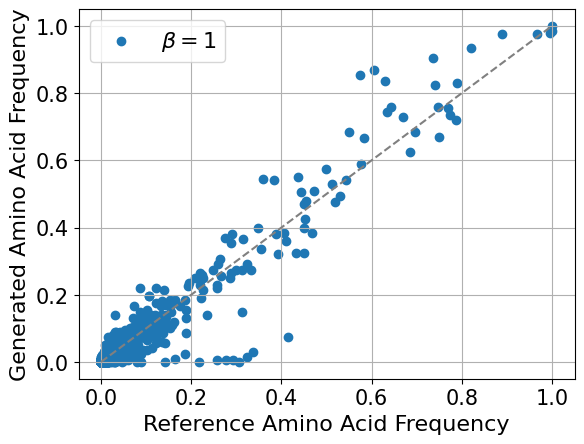

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\mc_generated_sequences\mc_gen_seqs_w_init_seq_Ns100000_r0.1.npy
first occurance of correlation lower than 0.15: 4872


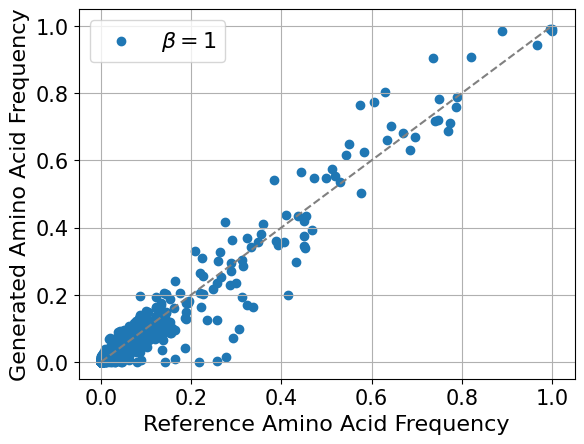

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\gill_generated_sequences\gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod.npy
first occurance of correlation lower than 0.15: 5203


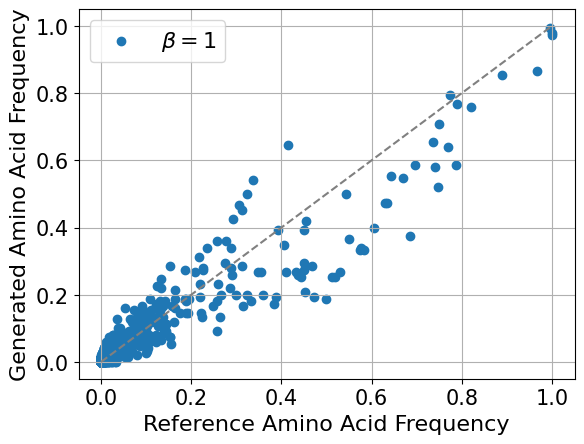

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\gill_generated_sequences\gill_generated_sequences_randinit_20000.npy
first occurance of correlation lower than 0.15: 180


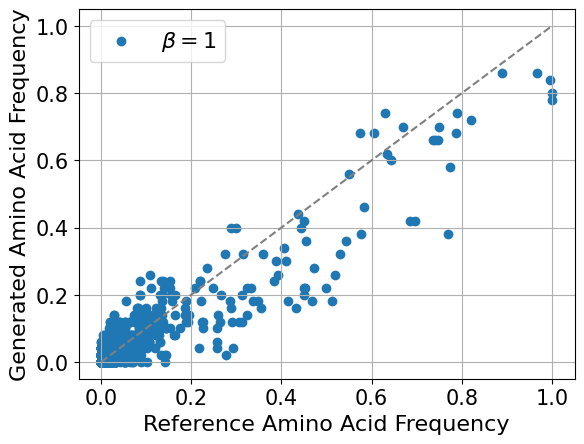

In [6]:

#----------- Load sequences with different betas -------------
#cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'


matplotlib.rc('font', **font)
file_test_data=r"C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\DataAttentionDCA\jdoms\jdoms_bacteria_train2.fasta"
seq_data_test=read_fasta_alignment(file_test_data,0.8)

print(seq_data_test.shape)
seq_data_test_filtered,_=remove_duplicate_sequences(seq_data_test)
true_sequences=seq_data_test_filtered.T
file_map = {
    'gen_seqs_w_init_seq_Ns40000_r0.1': 'generated_sequences',
    'mc_gen_seqs_w_init_seq_Ns100000_r0.1': 'mc_generated_sequences',
    'gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod':'gill_generated_sequences',
    'gill_generated_sequences_randinit_20000':'gill_generated_sequences'

}

ranges=[500,4000,700,120]
# file_map = {
#     'generated_sequences_randinit_40000': 'generated_sequences',
#     'mc_generated_sequences_randinit_100000': 'mc_generated_sequences',
#     'gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod':'gill_generated_sequences',
#     'gill_generated_sequences_randinit_20000':'gill_generated_sequences'

# }
# ranges=[200,400,700,120]
correlations_means = []
correlations_array = []

i=0
for filename, dir in file_map.items():
    cwd = os.getcwd()

    if dir=='generated_sequences':
        save_subdir = 'plm' 
    elif dir=='mc_generated_sequences':
        save_subdir='mc'
    elif dir=='gill_generated_sequences':
        save_subdir='gillespie'

    save_path = os.path.join(cwd, 'results', 'Decorrelation_plots', save_subdir)
    os.makedirs(save_path, exist_ok=True)
    cwd=r'C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'

    #cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
    output_file = os.path.join(cwd, 'CODE', 'AttentionDCA_python', 'src', 'PLM', dir, f'{filename}.npy')

    if os.path.exists(output_file):
        print(f"Loading: {output_file}")
        gen_sequences = np.load(output_file)
        # proceed with PCA or other processing...
    else:
        print(f"File not found: {output_file}")
    ###### decorrelation part########
    initial_sequence = gen_sequences[0]
    hamming_distances = []
    for seq in gen_sequences:
        distance = hamming_dist(initial_sequence, seq)
        hamming_distances.append(distance)
    hamming_distances = np.array(hamming_distances)
    correlation = energy_corr_array(hamming_distances, int(len(hamming_distances)/5))
    
    correlations_array.append(correlation)
    correlations_means.append(np.mean(correlation))
    threshold = 0.15

# Find the first index where value is less than threshold
    index = np.argmax(correlation < threshold) if np.any(correlation < threshold) else -1

    print("first occurance of correlation lower than 0.15:",index)  # Output: 3 (since arr[3] = 4 < 5)
    range = ranges[i]
    i+=1
    save_name = save_path + f'/{filename}.png'
    #plot_decorrelation(correlation,range,save_path=save_name)
    ############# Frequency part #############
    plot_frequencies_aa_pos(gen_sequences[::200],true_sequences,save_path=save_path,filename=filename,beta=1)



Total sequences read: 14502
Sequences after filtering: 14502
(63, 14502)
Removing duplicate sequences...
Done: 14502 -> 14502 sequences after removing duplicates.
Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\generated_sequences\gen_seqs_w_init_seq_Ns30000_r0.1_b0.1.npy


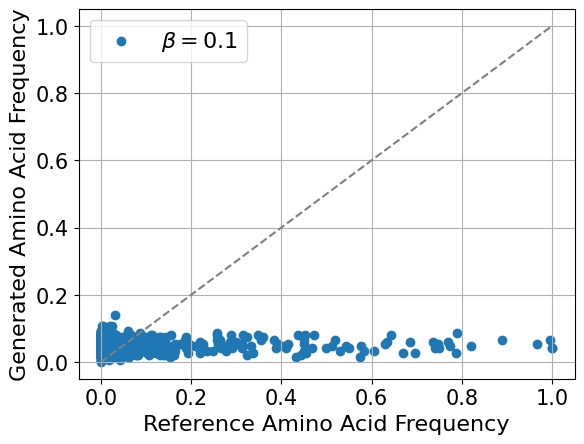

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\generated_sequences\gen_seqs_w_init_seq_Ns30000_r0.1_b0.01.npy


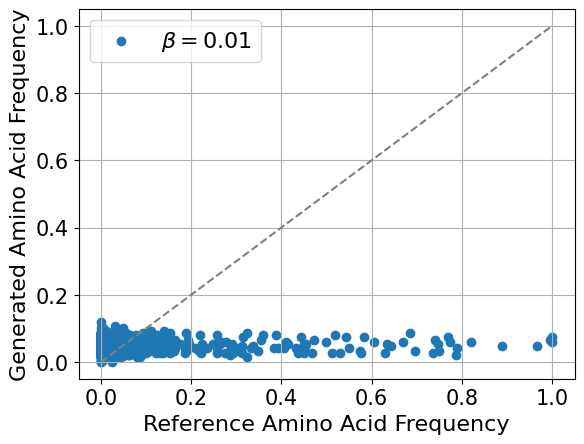

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\generated_sequences\gen_seqs_w_init_seq_Ns30000_r0.1_b2.npy


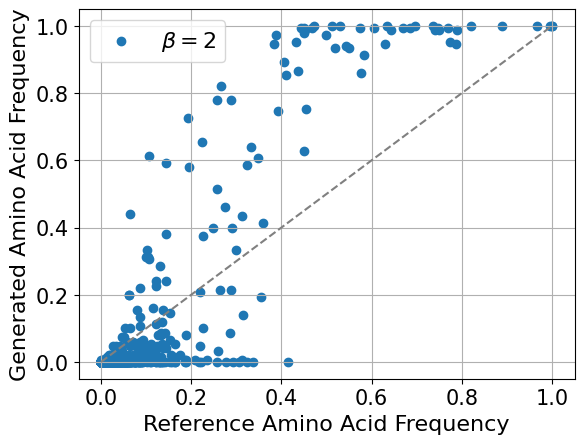

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\mc_generated_sequences\mc_gen_seqs_w_init_seq_Ns100000_r0.1_b0.1.npy


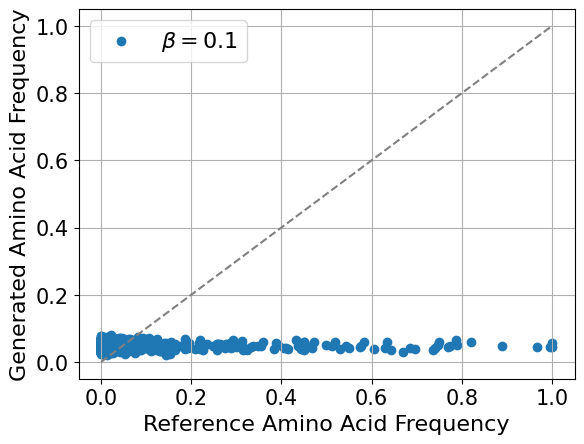

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\mc_generated_sequences\mc_gen_seqs_w_init_seq_Ns100000_r0.1_b0.01.npy


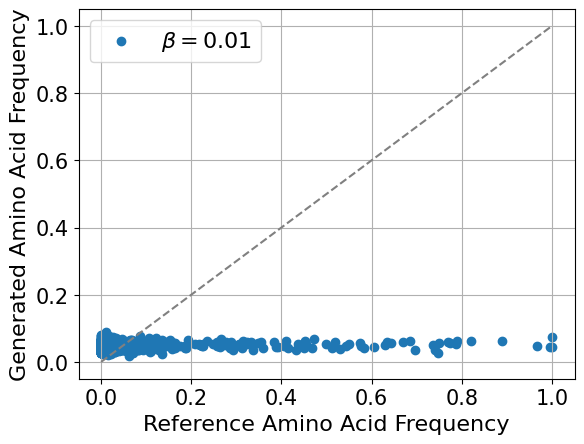

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\mc_generated_sequences\mc_gen_seqs_w_init_seq_Ns100000_r0.1_b2.npy


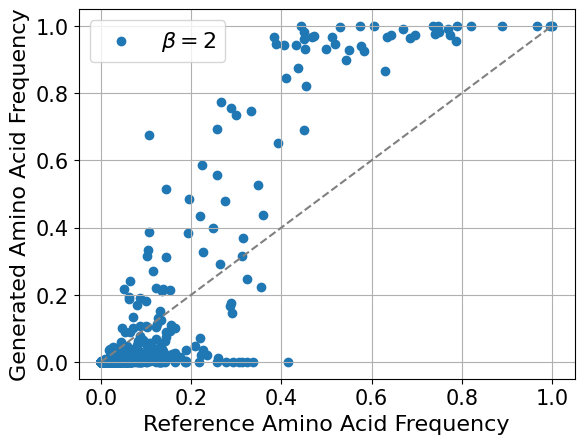

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\gill_generated_sequences\gill_generated_sequences_20000_beta_0.1.npy


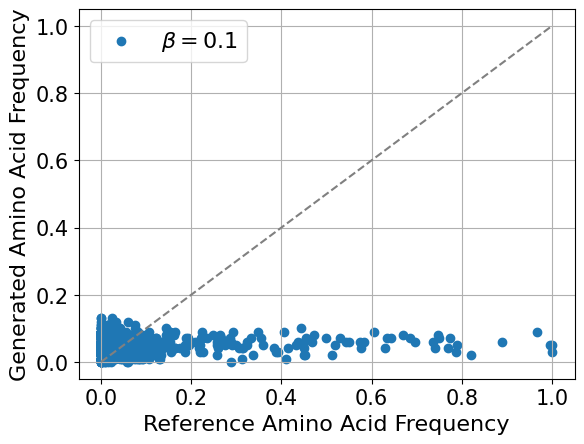

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\gill_generated_sequences\gill_generated_sequences_20000_beta_0.01.npy


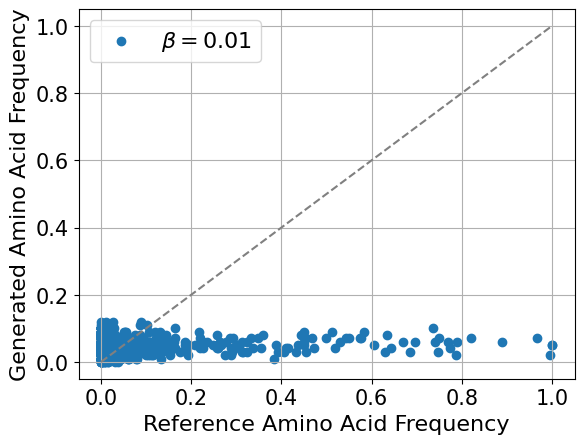

Loading: C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\AttentionDCA_python\src\PLM\gill_generated_sequences\gill_generated_sequences_20000_beta_2.npy


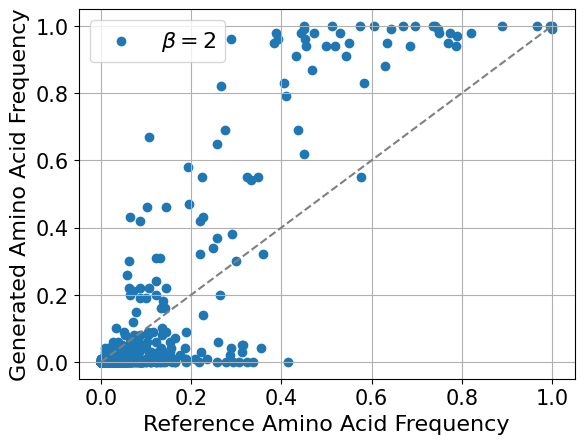

In [8]:

#----------- Load sequences with different betas -------------
#cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'


matplotlib.rc('font', **font)
file_test_data=r"C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\DataAttentionDCA\jdoms\jdoms_bacteria_train2.fasta"
seq_data_test=read_fasta_alignment(file_test_data,0.8)

print(seq_data_test.shape)
seq_data_test_filtered,_=remove_duplicate_sequences(seq_data_test)
true_sequences=seq_data_test_filtered.T
file_map={'generated_sequences':['gen_seqs_w_init_seq_Ns30000_r0.1_b0.1','gen_seqs_w_init_seq_Ns30000_r0.1_b0.01','gen_seqs_w_init_seq_Ns30000_r0.1_b2'],
          'mc_generated_sequences':['mc_gen_seqs_w_init_seq_Ns100000_r0.1_b0.1','mc_gen_seqs_w_init_seq_Ns100000_r0.1_b0.01','mc_gen_seqs_w_init_seq_Ns100000_r0.1_b2'],
          'gill_generated_sequences':['gill_generated_sequences_20000_beta_0.1','gill_generated_sequences_20000_beta_0.01','gill_generated_sequences_20000_beta_2']}
correlations_means = []
correlations_array = []


betas=[0.1,0.01,2]
for dir, filenames in file_map.items():
    i=0
    for filename in filenames:

        beta=betas[i]
        i+=1
        cwd = os.getcwd()

        if dir=='generated_sequences':
            save_subdir = 'plm' 
        elif dir=='mc_generated_sequences':
            save_subdir='mc'
        elif dir=='gill_generated_sequences':
            save_subdir='gillespie'

        save_path = os.path.join(cwd, 'results', 'frequency_beta', save_subdir)
        os.makedirs(save_path, exist_ok=True)
        cwd=r'C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'

        #cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
        output_file = os.path.join(cwd, 'CODE', 'AttentionDCA_python', 'src', 'PLM', dir, f'{filename}.npy')

        if os.path.exists(output_file):
            print(f"Loading: {output_file}")
            gen_sequences = np.load(output_file)
            # proceed with PCA or other processing...
        else:
            print(f"File not found: {output_file}")
       
        ############# Frequency part #############
        plot_frequencies_aa_pos(gen_sequences[::200],true_sequences,save_path=save_path,filename=filename,beta=beta)



In [ ]:

#----------- Load sequences with different betas -------------
#cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'


matplotlib.rc('font', **font)
file_test_data=r"C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\DataAttentionDCA\jdoms\jdoms_bacteria_train2.fasta"
seq_data_test=read_fasta_alignment(file_test_data,0.8)

print(seq_data_test.shape)
seq_data_test_filtered,_=remove_duplicate_sequences(seq_data_test)
true_sequences=seq_data_test_filtered.T
file_map = {
    'gen_seqs_w_init_seq_Ns40000_r0.1': 'generated_sequences',
    'mc_gen_seqs_w_init_seq_Ns100000_r0.1': 'mc_generated_sequences',
    'gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod':'gill_generated_sequences',
    'gill_generated_sequences_randinit_20000':'gill_generated_sequences'

}

ranges=[500,4000,700,120]
# file_map = {
#     'generated_sequences_randinit_40000': 'generated_sequences',
#     'mc_generated_sequences_randinit_100000': 'mc_generated_sequences',
#     'gill_gen_seqs_w_init_seq_Ns30000_r0.3_after_mod':'gill_generated_sequences',
#     'gill_generated_sequences_randinit_20000':'gill_generated_sequences'

# }
# ranges=[200,400,700,120]
correlations_means = []
correlations_array = []

i=0
for filename, dir in file_map.items():
   
    cwd=r'C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main'

    #cwd = '/Users/marzioformica/Desktop/EPFL/Master/MA2/Labo/my_project/PLM-gen-DCA/Attention-DCA-main'
    output_file = os.path.join(cwd, 'CODE', 'AttentionDCA_python', 'src', 'PLM', dir, f'{filename}.npy')

    if os.path.exists(output_file):
        print(f"Loading: {output_file}")
        gen_sequences = np.load(output_file)
        # proceed with PCA or other processing...
    else:
        print(f"File not found: {output_file}")
    
